In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
pd.read_sql_query('select * from reviews',conn).head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [5]:
pd.read_sql_query('select * from genres',conn).head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


In [6]:
pd.read_sql_query('select * from labels',conn).head()

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


In [7]:
df=pd.read_sql_query("select r.*,g.genre,l.label from reviews r left join genres g on r.reviewid=g.reviewid left join labels l on r.reviewid=l.reviewid",conn)

In [8]:
df.drop(['reviewid','title','url','pub_date'],axis=1,inplace=True)
df.head()

,artist,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,genre,label
0,massive attack,9.3,0,nate patrin,contributor,6,8,1,2017,electronic,virgin
1,krallice,7.9,0,zoe camp,contributor,5,7,1,2017,metal,hathenter
2,uranium club,7.3,0,david glickman,contributor,5,7,1,2017,rock,fashionable idiots
3,uranium club,7.3,0,david glickman,contributor,5,7,1,2017,rock,static shock
4,"kleenex, liliput",9.0,1,jenn pelly,associate reviews editor,4,6,1,2017,rock,kill rock stars


In [9]:
df.shape

(24909, 11)

In [10]:
df.isnull().sum()

artist               0
score                0
best_new_music       0
author               0
author_type       5422
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
genre             2553
label               40
dtype: int64

In [11]:
df['artist'].value_counts()

various artists      769
xiu xiu               40
animal collective     34
deerhoof              34
saint etienne         31
                    ... 
dj spinna              1
slowblow               1
first nation           1
dj q                   1
woebot                 1
Name: artist, Length: 8715, dtype: int64

In [12]:
df['best_new_music'].value_counts()

0    23559
1     1350
Name: best_new_music, dtype: int64

In [13]:
df['author'].value_counts()

joe tangari               1079
ian cohen                  961
stephen m. deusner         849
brian howe                 688
mark richardson            657
                          ... 
daniel crumb                 1
kris ex                      1
john everhart                1
zach hammerman               1
edwin "stats" houghton       1
Name: author, Length: 432, dtype: int64

In [14]:
df['author_type'].value_counts()

contributor                  16710
senior editor                  669
executive editor               655
senior staff writer            625
contributing editor            237
editor-in-chief                133
deputy news editor             129
associate staff writer         120
associate reviews editor        56
tracks coordinator              55
associate editor                54
assistant editor                19
associate features editor       17
news director                    5
managing editor                  3
Name: author_type, dtype: int64

In [15]:
df['pub_year'].value_counts()

2007    1714
2011    1712
2006    1701
2010    1687
2008    1680
2005    1627
2009    1585
2012    1575
2016    1556
2013    1546
2004    1526
2014    1505
2003    1449
2015    1313
2002    1251
2001     621
2000     497
1999     344
2017      20
Name: pub_year, dtype: int64

In [16]:
df['genre'].value_counts()

rock            10357
electronic       4221
experimental     1943
rap              1845
pop/r&b          1623
metal             914
folk/country      735
jazz              473
global            245
Name: genre, dtype: int64

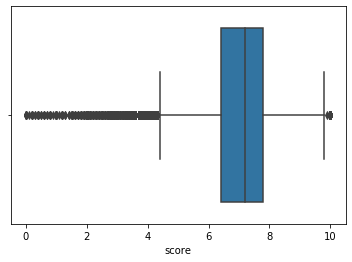

In [17]:
sns.boxplot(df['score'])

In [18]:
pd.crosstab(df['author'],df['author_type'])

author_type,assistant editor,associate editor,associate features editor,associate reviews editor,associate staff writer,contributing editor,contributor,deputy news editor,editor-in-chief,executive editor,managing editor,news director,senior editor,senior staff writer,tracks coordinator
author,,,,,,,,,,,,,,,
aaron leitko,0,1,0,0,0,0,128,0,0,0,0,0,0,0,0
abby garnett,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
abigail covington,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
abigail garnett,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
adam moerder,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vish khanna,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
william bowers,0,0,0,0,0,0,159,0,0,0,0,0,0,0,0
winston cook-wilson,0,0,0,0,0,0,54,0,0,0,0,0,0,0,0


In [19]:
df['author_type']=df['author_type'].fillna(df['author_type'].mode()[0])

In [20]:
df.isnull().sum()

artist               0
score                0
best_new_music       0
author               0
author_type          0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
genre             2553
label               40
dtype: int64

In [21]:
pd.crosstab(df['author'],df['genre'])

genre,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
author,,,,,,,,,
aaron leitko,13,29,3,2,5,6,1,1,55
abby garnett,3,0,0,0,0,0,1,0,0
abigail covington,0,0,0,0,0,0,0,2,0
abigail garnett,4,0,0,0,0,0,0,0,0
adam dlugacz,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
zach hammerman,0,0,0,0,0,0,1,0,0
zach hooker,13,4,0,0,6,0,3,0,24
zach kelly,57,9,0,1,0,3,20,14,83


In [22]:
pd.crosstab(df['artist'],df['genre'])

genre,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
artist,,,,,,,,,
!!!,0,0,0,0,0,0,0,0,6
"!!!, out hud",1,0,0,0,0,0,0,0,1
-ziq,5,0,0,0,0,0,0,0,0
"-ziq, kazumi",1,0,0,0,0,0,0,0,0
...and you will know us by the trail of dead,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...
zora jones,1,0,0,0,0,0,0,0,0
zs,0,0,0,0,7,0,0,0,0
zu,0,1,0,0,0,0,0,0,0


In [23]:
df.groupby(['artist','author'])['genre'].count()

artist          author              
                grayson haver currin    0
                ian cohen               0
!!!             brian howe              3
                cameron cook            1
                larry fitzmaurice       1
                                       ..
zu              mia clarke              1
zulu winter     laura snapes            2
zwan            ryan schreiber          0
zzzz            brian howe              1
{{{ sunset }}}  nate patrin             0
Name: genre, Length: 15606, dtype: int64

In [26]:
for i in df['author']:
    print(i,':',df[df['author']==i]['genre'].mode()[0])

nate patrin : rap
zoe camp : rock
david glickman : rock
david glickman : rock
jenn pelly : rock
jenn pelly : rock
kevin lozano : electronic
vanessa okoth-obbo : pop/r&b
katherine st. asaph : rock
andy beta : electronic
andy beta : electronic
ian cohen : rock
marc masters : rock
sheldon pearce : rap
thea ballard : electronic
marcus j. moore : pop/r&b
marcus j. moore : pop/r&b
dean van nguyen : rap
louis pattison : electronic
philip sherburne : electronic
sheldon pearce : rap
sheldon pearce : rap
benjamin scheim : rock
rebecca haithcoat : pop/r&b
rebecca haithcoat : pop/r&b
sam sodomsky : rock
benjamin scheim : rock
seth colter walls : experimental
benjamin scheim : rock
benjamin scheim : rock
brian howe : rock
marc hogan : rock
quinn moreland : rock
andy beta : electronic
seth colter-walls : jazz
sheldon pearce : rap
savy reyes-kulkarni : metal
renato pagnani : pop/r&b
kevin lozano : electronic
matthew strauss : rap
matthew strauss : rap
matthew strauss : rap
matthew strauss : rap
sheld

cameron cook : electronic
jason heller : rock
andy beta : electronic
julianne escobedo shepherd : rap
julianne escobedo shepherd : rap
ian cohen : rock
brian howe : rock
stuart berman : rock
jenn pelly : rock
sam sodomsky : rock
andy beta : electronic
andy o'connor : metal
marcus k. dowling : pop/r&b
matthew ramirez : rap
sheldon pearce : rap
seth colter walls : experimental
andy beta : electronic
steven hyden : rock
jesse jarnow : rock
cameron cook : electronic
seth colter walls : experimental
andy beta : electronic
amanda petrusich : rock
mark richardson : rock
philip sherburne : electronic
saby reyes-kulkarni : metal
saby reyes-kulkarni : metal
jonah bromwich : electronic
saby reyes-kulkarni : metal
kevin lozano : electronic
stuart berman : rock
dean van nguyen : rap
dean van nguyen : rap
winston cook-wilson : rap
evan rytlewski : rock
colin joyce : electronic
sam sodomsky : rock
nate patrin : rap
sheldon pearce : rap
marc masters : rock
jonah bromwich : electronic
jonah bromwich : 

thea ballard : electronic
mehan jayasuriya : rap
kevin lozano : electronic
ian cohen : rock
philip sherburne : electronic
andy beta : electronic
amanda petrusich : rock
laura snapes : rock
kathy iandoli : rap
andy beta : electronic
benjamin scheim : rock
laura snapes : rock
nate patrin : rap
kevin lozano : electronic
nathan reese : electronic
jonah bromwich : electronic
jonah bromwich : electronic
jazz monroe : rock
david glickman : rock
david glickman : rock
david glickman : rock
philip sherburne : electronic
philip sherburne : electronic
brian howe : rock
quinn moreland : rock
quinn moreland : rock
andrew gaerig : electronic
rebecca haithcoat : pop/r&b
jazz monroe : rock
raymond cummings : rock
stuart berman : rock
jenn pelly : rock
jenn pelly : rock
benjamin scheim : rock
kathy iandoli : rap
zoe camp : rock
jay balfour : rap
carvell wallace : pop/r&b
carvell wallace : pop/r&b
laura snapes : rock
sam sodomsky : rock
allison hussey : rock
philip sherburne : electronic
mark richardson 

andy beta : electronic
amanda petrusich  : jazz
zoe camp : rock
zoe camp : rock
stuart berman : rock
jazz monroe : rock
jazz monroe : rock
kevin lozano : electronic
mark richardson : rock
jay balfour : rap
jay balfour : rap
jay balfour : rap
pat healy : rock
evan minsker : rock
andy beta : electronic
andy beta : electronic
saby reyes-kulkarni : metal
evan rytlewski : rock
john s.w. macdonald : rock
winston cook-wilson : rap
kevin lozano : electronic
philip sherburne : electronic
kris ex : rap
kris ex : rap
mike powell : rock
saby reyes-kulkarni : metal
andrew gaerig : electronic
corban goble : rap
t. cole rachel : rock
andy beta : electronic
zoe camp : rock
zoe camp : rock
stuart berman : rock
stuart berman : rock
allison hussey : rock
cameron cook : electronic
sheldon pearce : rap
jay balfour : rap
jay balfour : rap
mark richardson : rock
jayson greene : rock
sheldon pearce : rap
laura snapes : rock
saby reyes-kulkarni : metal
laura snapes : rock
benjamin scheim : rock
benjamin scheim

miles raymer : electronic
kevin lozano : electronic
stephen m. deusner : rock
simon reynolds : rock
jia tolentino : pop/r&b
sheldon pearce : rap
marcus j. moore : pop/r&b
sam hockley-smith : rock
ian cohen : rock
matthew strauss : rap
matthew strauss : rap
t. cole rachel : rock
zoe camp : rock
miles raymer : electronic
amanda petrusich : rock
amanda petrusich : rock
grayson haver currin : metal
mosi reeves : rap
evan rytlewski : rock
evan rytlewski : rock
andy beta : electronic
craig jenkins : rap
pat healy : rock
philip sherburne : electronic
evan rytlewski : rock
zoe camp : rock
zoe camp : rock
cameron cook : electronic
winston cook-wilson : rap
t. cole rachel : rock
ian cohen : rock
zoe camp : rock
jazz monroe : rock
jazz monroe : rock
jazz monroe : rock
zoe camp : rock
philip sherburne : electronic
pat healy : rock
andy beta : electronic
andy beta : electronic
katherine st. asaph : rock
stuart berman : rock
philip sherburne : electronic
kevin lozano : electronic
jazz monroe : rock


grayson haver currin : metal
mike powell : rock
philip sherburne : electronic
leor galil : electronic
sam lefebvre : rock
andy o'connor : metal
andy o'connor : metal
ian cohen : rock
jonathan bernstein : rock
brandon stosuy : rock
zoe camp : rock
britt julious : pop/r&b
stuart berman : rock
laura snapes : rock
nina corcoran : experimental
louis pattison : electronic
jonah bromwich : electronic
evan rytlewski : rock
tayler montague : rap
pat healy : rock
philip sherburne : electronic
israel daramola : rap
anupa mistry : pop/r&b
anupa mistry : pop/r&b
j. edward keyes : rock
brad nelson : rock
laura snapes : rock
philip sherburne : electronic
anupa mistry : pop/r&b
anupa mistry : pop/r&b
zoe camp : rock
zoe camp : rock
ron hart : rock
ron hart : rock
mehan jayasuriya : rap
andrew gaerig : electronic
jeremy gordon : rock
jeremy gordon : rock
puja patel : electronic
laura snapes : rock
hazel cills : rock
abby garnett : electronic
ryan dombal : rock
brandon stosuy : rock
felipe delerme : rap

matthew ramirez : rap
matthew ramirez : rap
philip sherburne : electronic
hazel cills : rock
b. david zarley : rap
anupa mistry : pop/r&b
anupa mistry : pop/r&b
philip sherburne : electronic
philip sherburne : electronic
katherine st. asaph : rock
katherine st. asaph : rock
meaghan garvey : rap
saby reyes-kulkarni : metal
stuart berman : rock
andy beta : electronic
laura snapes : rock
laura snapes : rock
jayson greene : rock
winston cook-wilson : rap
jayson greene : rock
marcus j. moore : pop/r&b
marcus j. moore : pop/r&b
miles raymer : electronic
seth colter walls : experimental
jason heller : rock
seth colter walls : experimental
meaghan garvey : rap
philip sherburne : electronic
laura snapes : rock
laura snapes : rock
laura snapes : rock
ian cohen : rock
zoe camp : rock
laura snapes : rock
laura snapes : rock
nate patrin : rap
eric torres : pop/r&b
aaron leitko : rock
aaron leitko : rock
ernest wilkins : rap
jessica hopper : rock
jes skolnik : rock
brad nelson : rock
evan rytlewski 

marcus j. moore : pop/r&b
zach kelly : rock
sasha geffen : rock
t. cole rachel : rock
rawiya kameir : rap
rawiya kameir : rap
jason heller : rock
stuart berman : rock
anupa mistry : pop/r&b
ian cohen : rock
claire lobenfeld : electronic
claire lobenfeld : electronic
matthew ramirez : rap
paul thompson : rock
mark richardson : rock
anupa mistry : pop/r&b
nick neyland : rock
jazz monroe : rock
jeremy gordon : rock
andy o'connor : metal
andy o'connor : metal
mark pytlik : electronic
abigail garnett : electronic
colin joyce : electronic
andy beta : electronic
brandon stosuy : rock
philip sherburne : electronic
philip sherburne : electronic
grayson haver currin : metal
nick neyland : rock
corban goble : rap
sheldon pearce : rap
katherine st. asaph : rock
katherine st. asaph : rock
craig jenkins : rap
nick neyland : rock
ian cohen : rock
ian cohen : rock
jayson greene : rock
philip sherburne : electronic
sam lefebvre : rock
stephen m. deusner : rock
stephen m. deusner : rock
brian howe : roc

grayson haver currin : metal
nate patrin : rap
jayson greene : rock
ian cohen : rock
hazel cills : rock
hazel cills : rock
joe tangari : rock
devon maloney : rock
grayson haver currin : metal
grayson haver currin : metal
douglas wolk : rock
ian cohen : rock
zoe camp : rock
evan minsker : rock
evan minsker : rock
evan minsker : rock
philip sherburne : electronic
nate patrin : rap
jonah bromwich : electronic
philip sherburne : electronic
philip sherburne : electronic
colin joyce : electronic
renato pagnani : pop/r&b
renato pagnani : pop/r&b
craig jenkins : rap
aaron leitko : rock
aaron leitko : rock
aaron leitko : rock
aaron leitko : rock
jonah bromwich : electronic
jonah bromwich : electronic
jason heller : rock
jason heller : rock
andy o'connor : metal
andy o'connor : metal
stuart berman : rock
hazel cills : rock
jamieson cox : rock
jamieson cox : rock
paul thompson : rock
andrew gaerig : electronic
jason heller : rock
stuart berman : rock
philip sherburne : electronic
jason heller : r

patric fallon : electronic
eric harvey : rock
eric harvey : rock
jason heller : rock
rob mitchum : rock
larry fitzmaurice : rock
larry fitzmaurice : rock
craig jenkins : rap
craig jenkins : rap
jason heller : rock
grayson haver currin : metal
jason heller : rock
jason heller : rock
jamieson cox : rock
ian cohen : rock
nick neyland : rock
philip sherburne : electronic
stephen m. deusner : rock
ian cohen : rock
ian cohen : rock
jamieson cox : rock
jayson greene : rock
kim kelly : metal
andrew ryce : electronic
stephen m. deusner : rock
stuart berman : rock
stuart berman : rock
nick neyland : rock
andy beta : electronic
larry fitzmaurice : rock
nate patrin : rap
stuart berman : rock
stuart berman : rock
nick neyland : rock
andrew gaerig : electronic
grayson haver currin : metal
grayson haver currin : metal
ian cohen : rock
paul thompson : rock
larry fitzmaurice : rock
philip sherburne : electronic
matt lemay : rock
matt lemay : rock
jayson greene : rock
zoe camp : rock
zoe camp : rock
lar

colin joyce : electronic
katherine st. asaph : rock
jason heller : rock
miles raymer : electronic
miles raymer : electronic
t. cole rachel : rock
stuart berman : rock
ian cohen : rock
stephen m. deusner : rock
jamieson cox : rock
grayson haver currin : metal
grayson haver currin : metal
ian cohen : rock
ian cohen : rock
nick neyland : rock
ian cohen : rock
ian cohen : rock
ian cohen : rock
ian cohen : rock
ian cohen : rock
ian cohen : rock
miles raymer : electronic
paul thompson : rock
paul thompson : rock
jamieson cox : rock
jamieson cox : rock
grayson haver currin : metal
jason heller : rock
renato pagnani : pop/r&b
evan minsker : rock
jayson greene : rock
stephen m. deusner : rock
larry fitzmaurice : rock
larry fitzmaurice : rock
jeremy gordon : rock
jeremy gordon : rock
jason heller : rock
grayson haver currin : metal
grayson haver currin : metal
jayson greene : rock
jayson greene : rock
stuart berman : rock
stuart berman : rock
ian cohen : rock
stephen m. deusner : rock
nate patri

ian cohen : rock
evan minsker : rock
evan minsker : rock
andy beta : electronic
andrew gaerig : electronic
stephen m. deusner : rock
stuart berman : rock
jayson greene : rock
jayson greene : rock
nick neyland : rock
evan minsker : rock
grayson haver currin : metal
lindsay zoladz : rock
andrew ryce : electronic
andrew ryce : electronic
nick neyland : rock
nate patrin : rap
marc masters : rock
paul thompson : rock
jonah bromwich : electronic
larry fitzmaurice : rock
jason heller : rock
andy o'connor : metal
nate patrin : rap
jason heller : rock
jason heller : rock
jason heller : rock
andy beta : electronic
ian cohen : rock
stuart berman : rock
carrie battan : pop/r&b
grayson haver currin : metal
andy beta : electronic
zoe camp : rock
mike powell : rock
marc masters : rock
brian howe : rock
brian howe : rock
kim kelly : metal
kim kelly : metal
kim kelly : metal
larry fitzmaurice : rock
larry fitzmaurice : rock
nate patrin : rap
brandon stosuy : rock
joel oliphint : rock
t. cole rachel : r

nick neyland : rock
eric harvey : rock
eric harvey : rock
stephen m. deusner : rock
stephen m. deusner : rock
ian cohen : rock
zach kelly : rock
zach kelly : rock
craig jenkins : rap
stuart berman : rock
stuart berman : rock
nate patrin : rap
ian cohen : rock
ruth saxelby : electronic
miles raymer : electronic
grayson currin : rock
nick neyland : rock
nick neyland : rock
marc masters : rock
marc masters : rock
marc masters : rock
marc masters : rock
ian cohen : rock
jordan sargent : rap
jordan sargent : rap
ian cohen : rock
brandon stosuy : rock
brandon stosuy : rock
angus finlayson : electronic
marc masters : rock
gabriel szatan : electronic
jason heller : rock
marc masters : rock
marc masters : rock
marc masters : rock
marc masters : rock
katherine st. asaph : rock
jayson greene : rock
grayson currin : rock
ian cohen : rock
ian cohen : rock
stephen m. deusner : rock
nick neyland : rock
joel oliphint : rock
grayson currin : rock
jayson greene : rock
miles raymer : electronic
jeremy d.

IndexError: index out of bounds

In [27]:
df[df['author']=='aaron leitko']['genre'].value_counts().idxmax()

'rock'

In [28]:
df[df['author']=='aaron leitko']['genre'].mode()[0]

'rock'

In [31]:
s=set(df[df['genre'].isnull()]['author'])
for i in df['author']:
    print(i,':',df[df['author']==i]['genre'].mode()[0])

{'aaron leitko',
 'abby garnett',
 'adam moerder',
 'adrienne day',
 'al shipley',
 'alex linhardt',
 'alexander lloyd linhardt',
 'alison fields',
 'amanda petrusich',
 'amy granzin',
 'amy phillips',
 'andrew bryant',
 'andrew gaerig',
 'andrew ryce',
 'andy battaglia',
 'andy beta',
 'andy beta, brandon stosuy & mark richardson',
 "andy o'connor",
 'angus finlayson',
 'anupa mistry',
 'austin gaines',
 'barry walters',
 'benjamin scheim',
 'bill morris',
 'brad haywood',
 'brandon soderberg',
 'brandon stosuy',
 'brendan reid',
 'brent dicrescenzo',
 'brent s. sirota',
 'brian howe',
 'brian james',
 'cameron macdonald',
 'camilo arturo leslie',
 'carrie battan',
 'catherine lewis',
 'chip chanko',
 'chris dahlen',
 'chris randle',
 'christopher dare',
 'christopher f. schiel',
 'clayton purdom',
 'colin joyce',
 'colin st. john',
 'corban goble',
 'cory d. byrom',
 'cosmo lee',
 'craig jenkins',
 'dan gardopee',
 'dan kilian',
 'daphne carr',
 'dave stelfox',
 'david bevan',
 'davi